In [2]:
import tensorflow as tf
tf.get_logger().setLevel('INFO')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
import pickle
import time
import os

In [3]:
#read modified data
pickle_in = open('X.pickle', 'rb')
X = pickle.load(pickle_in)

#read modified data
pickle_in = open('y.pickle', 'rb')
y = pickle.load(pickle_in)

In [4]:
X.shape

(24946, 100, 100)

In [5]:
y.shape

(24946,)

In [6]:
X[0]

array([[205, 200, 204, ..., 140, 145, 121],
       [193, 201, 207, ..., 131, 126, 111],
       [198, 192, 206, ...,  97,  98,  96],
       ...,
       [212, 215, 207, ..., 145, 155, 152],
       [232, 227, 225, ..., 127, 140, 127],
       [219, 222, 219, ..., 101, 117,  94]], dtype=uint8)

In [7]:
X = X/255.0
X[0]

array([[0.80392157, 0.78431373, 0.8       , ..., 0.54901961, 0.56862745,
        0.4745098 ],
       [0.75686275, 0.78823529, 0.81176471, ..., 0.51372549, 0.49411765,
        0.43529412],
       [0.77647059, 0.75294118, 0.80784314, ..., 0.38039216, 0.38431373,
        0.37647059],
       ...,
       [0.83137255, 0.84313725, 0.81176471, ..., 0.56862745, 0.60784314,
        0.59607843],
       [0.90980392, 0.89019608, 0.88235294, ..., 0.49803922, 0.54901961,
        0.49803922],
       [0.85882353, 0.87058824, 0.85882353, ..., 0.39607843, 0.45882353,
        0.36862745]])

1


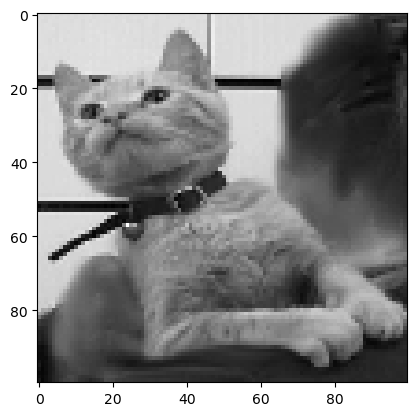

In [8]:
index = 3548
plt.imshow(X[index], cmap='gray')
print(y[index])

In [22]:
model_name = 'cats-vs-dogs-cnn-100x100-' + str(int(time.time()))
model_name

'cats-vs-dogs-cnn-100x100-1670101393'

In [23]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs/' + model_name)

In [24]:
# model arch
model = tf.keras.models.Sequential()



# Add convolutions and max pooling
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 100,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 64)      

In [26]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [28]:
model.fit(X, y, epochs=10, batch_size=32, validation_split=0.1, callbacks=[tensorboard])

2022-12-03 23:03:45.607886: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 898040000 exceeds 10% of free system memory.


Epoch 1/10
702/702 [==============================] - 98s 139ms/step - loss: 0.6036 - accuracy: 0.6648 - val_loss: 0.5115 - val_accuracy: 0.7447
Epoch 2/10
702/702 [==============================] - 86s 122ms/step - loss: 0.4777 - accuracy: 0.7708 - val_loss: 0.4634 - val_accuracy: 0.7800
Epoch 3/10
702/702 [==============================] - 66s 95ms/step - loss: 0.4167 - accuracy: 0.8086 - val_loss: 0.4217 - val_accuracy: 0.7988
Epoch 4/10
702/702 [==============================] - 108s 154ms/step - loss: 0.3700 - accuracy: 0.8348 - val_loss: 0.4293 - val_accuracy: 0.7988
Epoch 5/10
702/702 [==============================] - 90s 128ms/step - loss: 0.3119 - accuracy: 0.8631 - val_loss: 0.4179 - val_accuracy: 0.8192
Epoch 6/10
702/702 [==============================] - 67s 96ms/step - loss: 0.2611 - accuracy: 0.8889 - val_loss: 0.4008 - val_accuracy: 0.8361
Epoch 7/10
702/702 [==============================] - 68s 97ms/step - loss: 0.2036 - accuracy: 0.9131 - val_loss: 0.4402 - val_accu

In [ ]:
#run in terminal to launch tensorboard
#tensorboard --logdir='logs/'

In [33]:
model_name = 'cats-vs-dogs-cnn-100x100-32dense-64batch-size' + str(int(time.time()))
model_name

tensorboard = tf.keras.callbacks.TensorBoard(log_dir = 'logs/' + model_name)


# model arch
model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100,1)))
model.add(tf.keras.layers.MaxPooling2D(2, 2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))


model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10, batch_size=64, validation_split=0.1, callbacks=[tensorboard])

2022-12-03 23:27:56.701805: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 898040000 exceeds 10% of free system memory.


Epoch 1/10
351/351 [==============================] - 333s 940ms/step - loss: 0.6490 - accuracy: 0.6000 - val_loss: 0.5555 - val_accuracy: 0.7154
Epoch 2/10
351/351 [==============================] - 331s 943ms/step - loss: 0.5046 - accuracy: 0.7541 - val_loss: 0.4769 - val_accuracy: 0.7667
Epoch 3/10
351/351 [==============================] - 322s 917ms/step - loss: 0.4241 - accuracy: 0.8050 - val_loss: 0.4199 - val_accuracy: 0.8096
Epoch 4/10
351/351 [==============================] - 322s 917ms/step - loss: 0.3766 - accuracy: 0.8305 - val_loss: 0.3636 - val_accuracy: 0.8361
Epoch 5/10
351/351 [==============================] - 322s 919ms/step - loss: 0.3312 - accuracy: 0.8558 - val_loss: 0.3569 - val_accuracy: 0.8405
Epoch 6/10
351/351 [==============================] - 322s 918ms/step - loss: 0.2920 - accuracy: 0.8739 - val_loss: 0.3708 - val_accuracy: 0.8333
Epoch 7/10
351/351 [==============================] - 323s 920ms/step - loss: 0.2475 - accuracy: 0.8939 - val_loss: 0.3546 -

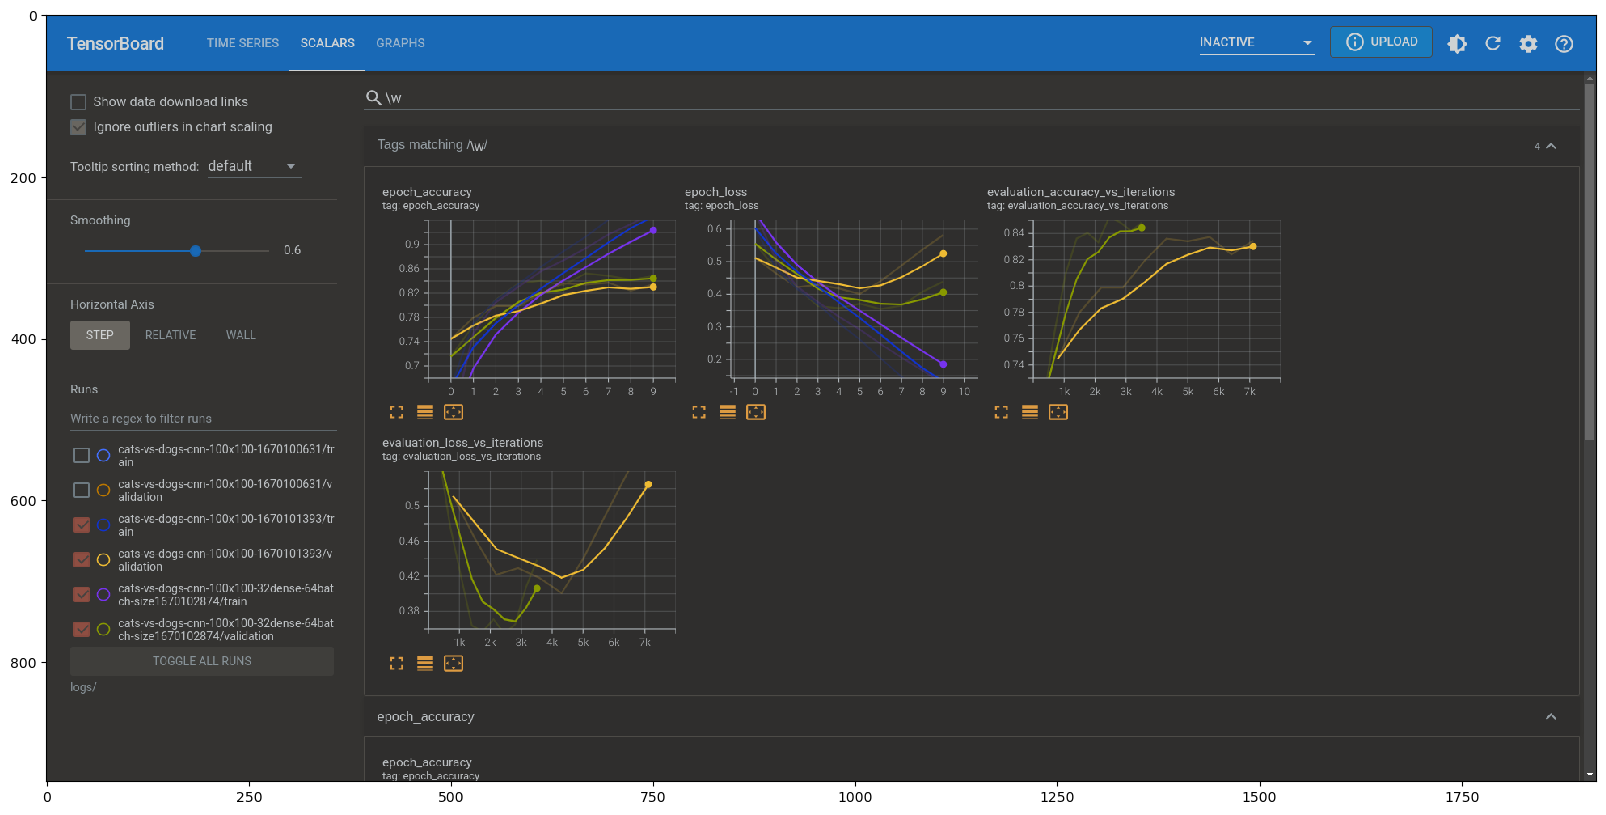

In [48]:
graphs_path = os.getcwd() + '/logs/cats-vs-dogs-cnn-100x100-1670101393/32dense-64batch.png'

from matplotlib.pyplot import figure
figure(figsize=(20, 15))
plt.imshow(cv2.imread(graphs_path));